In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [2]:
encoding_dim = 32

In [26]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder=Model(input_img, decoded)

In [27]:
encoder = Model(input_img, encoded)

In [28]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [30]:
from keras.datasets import mnist
import numpy as np

In [31]:
(x_train, _), (x_test, _) = mnist.load_data()

In [32]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [33]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.6712 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.6025 - val_loss: 0.3725
Epoch 3/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3272 - val_loss: 0.3141
Epoch 4/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.3092 - val_loss: 0.3049
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3023 - val_loss: 0.2997
Epoch 6/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2979 - val_loss: 0.2959
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2945 - val_loss: 0.2930
Epoch 8/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2918 - val_loss: 0.2905
Epoch 9/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.2896 - val_loss: 0.

Epoch 77/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.2635 - val_loss: 0.2634
Epoch 78/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2634 - val_loss: 0.2632
Epoch 79/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2633 - val_loss: 0.2632
Epoch 80/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2632 - val_loss: 0.2631
Epoch 81/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2631 - val_loss: 0.2630
Epoch 82/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2630 - val_loss: 0.2629
Epoch 83/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2629 - val_loss: 0.2628
Epoch 84/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2628 - val_loss: 0.2627
Epoch 85/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.2627 - val_loss: 0.2626
Epoch 86/100
60000/60000 [===========

In [34]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [35]:
import matplotlib.pyplot as plt

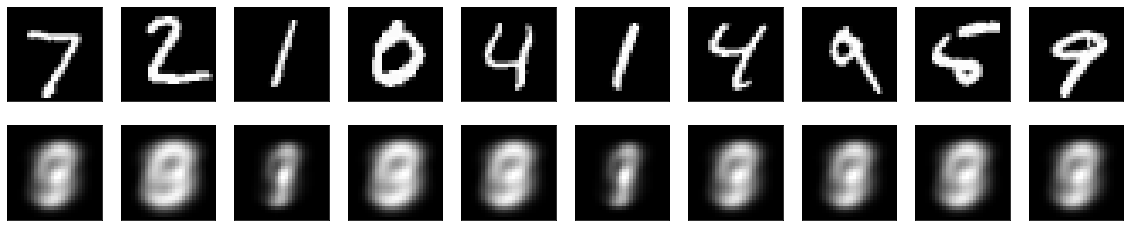

In [36]:
n= 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
